In [5]:
import os
from sys import path

n_nested_folder = 1
folder_path = os.path.abspath('')

for i in range(n_nested_folder):
    folder_path, _ = os.path.split(folder_path)

path.append(folder_path)

import numpy as np
from Source.Disc.MakeSbpOp import MakeSbpOp
from Source.Disc.MakeMesh import MakeMesh
from Source.Methods.Analysis import plot_sparsity
import matplotlib.pyplot as plt

In [6]:
%%script echo skipping
# find a nice function to define the transformation
xmin = 0
xmax = 1
dom_len = xmax-xmin
warp_factor = 1.4901161193847656e-08
warp_factor2 = 0.
xcrit = 0.

x = np.linspace(0,1,num=100,endpoint=True)
a = warp_factor
b = warp_factor2
xk = xcrit
assert(a>=0),'warp_factor must be >0, or >1 to squish at boundaries'
assert(b <= xk**(1-a)/(a*(1-2*xk)+2*xk) and b >= 0),'warp_factor2={0} outside allowed range [0,{1}]'.format(b, xk**(1-a)/(a*(1-2*xk)+2*xk))
assert(xk >= 0 and xk <= 0.5),'warp_factor3 must be between 0 and 0.5'
c1 = -a*b*xk**(a-1) + 1 + 2*(a-1)*b*xk**a
c2 = (a-1)*b*xk**a + 0.5
f = np.where(x<=xk, b*x**a+c1*x,0)
f = np.where(((xk<=x) & (x<=1-xk)), c2*(2*x-1)+0.5,f)
f = np.where(1-xk<=x, 1-b*(1-x)**a-c1*(1-x),f)
df = np.where(x<=xk, a*b*x**(a-1)+c1,0)
df = np.where(((xk<=x) & (x<=1-xk)), c2*2,df)
df = np.where(1-xk<=x, a*b*(1-x)**(a-1)+c1,df)
#f = dom_len*((1+warp_factor)*(arg-0.5)/(1+warp_factor*np.abs(2*arg-1)) + 0.5) + xmin
#df = (1+warp_factor)/((1+warp_factor*np.abs(2*arg-1))**2)
df2 = (f[2:]-f[:-2])/(x[2]-x[0])
plt.plot(x,f)
plt.plot(x,x)
plt.figure()
plt.plot(x,df)
plt.plot(x[1:-1],df2)

skipping


... Building reference operators
Test: Quadrature H is order 3.
Test: Derivative D is degree 2.
Test: Derivative D is order 2.9 in test 1, 3.0 in test 2. (element-refinement, so should expect p+1)
Test: Compatibility equations hold to order 2
Test: The interpolation tL/tR is exact, i.e. there are boundary nodes.
Test: The operator succesfully passed all decomposition tests.
... Building Mesh


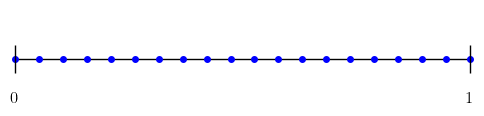

In [7]:
p=2
nn=20
refref = MakeSbpOp(p=p,sbp_type='csbp',nn=nn)
Hrefref, Drefref = np.diag(refref.H), refref.D
refrefmesh = MakeMesh(dim=1,xmin=0,xmax=1,nelem=1,x_op=refref.x,warp_factor=0,warp_type='default')
refrefmesh.plot()

... Building Mesh
... Stretching mesh by a factor of 0.416


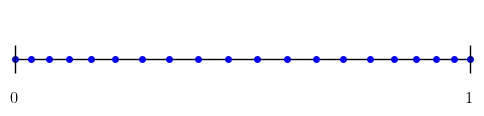

In [8]:

warp_factor = 0.416 #0.67
warp_factor2 = 0.
xcrit = 0.
warp_type = 'tanh'
refmesh = MakeMesh(dim=1,xmin=0,xmax=1,nelem=1,x_op=refref.x,warp_factor=warp_factor,warp_type=warp_type,warp_factor2=warp_factor2,warp_factor3=xcrit)
refmesh.plot()

In [9]:
refmesh.get_jac_metrics(refref, periodic=False,
                        metric_method = 'exact', 
                        bdy_metric_method = 'exact',
                        jac_method='exact',
                        use_optz_metrics = 'False',
                        calc_exact_metrics = False)
Href, Dref, _ = refref.ref_2_phys(refmesh, 'skew_sym')
Href, Dref = Href[:,0], Dref[:,:,0]

... Computing Grid Metrics
... Creating physical operators


In [18]:
#print(Href)
#print(Hrefref)
from Source.Methods.DebugTools import Check_Taylor_Series_1D
Check_Taylor_Series_1D(Dref,refmesh.x,num_terms=6)
Check_Taylor_Series_1D(Drefref,refref.x,num_terms=6)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
%%script echo skipping
plot_sparsity(Drefref,figsize=(3,3))
plot_sparsity(Dref,figsize=(3,3))

skipping


In [26]:
xrefref = refrefmesh.x
xref = refmesh.x
def ufunc(x):
    return np.sin(np.pi*x)
def ufuncder(x):
    return np.pi*np.cos(np.pi*x)
ter_refref = Drefref @ ufunc(xrefref) - ufuncder(xrefref)
ter_ref = Dref @ ufunc(xref) - ufuncder(xref)
#ter_ref = Dref @ ufunc(xrefref) - ufuncder(xrefref)

print(np.mean(abs(ter_refref)), 'vs', np.mean(abs(ter_ref)))
print(ter_refref@np.diag(Hrefref)@ter_refref, 'vs', ter_ref@np.diag(Href)@ter_ref)

0.00544988870379561 vs 0.005701617638613235
7.436918028906487e-05 vs 7.222249237902121e-05


In [27]:
print('reference reference')
MakeSbpOp.check_accuracy(Drefref, xrefref)
print('reference')
MakeSbpOp.check_accuracy(Dref, xref)

reference reference
Test: Derivative D is order 2.9 in test 1, 3.0 in test 2. (element-refinement, so should expect p+1)
reference
Test: Derivative D is order 0.97 in test 1, 0.99 in test 2. (element-refinement, so should expect p+1)


In [28]:
Dref @ xref

array([1.00098286, 0.9996177 , 1.00004882, 1.00008819, 0.99999894,
       0.99999875, 0.99999859, 0.99999846, 0.99999837, 0.99999833,
       0.99999833, 0.99999837, 0.99999846, 0.99999859, 0.99999875,
       0.99999894, 1.00008819, 1.00004882, 0.9996177 , 1.00098286])

In [29]:
print(np.mean(np.abs(Drefref @ np.sin(0.5*xrefref+0.1) - 0.5*np.cos(0.5*xrefref+0.1))))
print(np.mean(np.abs(Drefref @ np.sin(0.25*xrefref+0.1) - 0.25*np.cos(0.25*xrefref+0.1))))
print(np.mean(np.abs(Drefref @ np.sin(0.125*xrefref+0.1) - 0.125*np.cos(0.125*xrefref+0.1))))

2.0459803864086856e-05
2.704536161962645e-06
3.4384774319287657e-07


In [30]:
print(np.mean(np.abs(Dref @ np.sin(0.5*xref+0.1) - 0.5*np.cos(0.5*xref+0.1))))
print(np.mean(np.abs(Dref @ np.sin(0.25*xref+0.1) - 0.25*np.cos(0.25*xref+0.1))))
print(np.mean(np.abs(Dref @ np.sin(0.125*xref+0.1) - 0.125*np.cos(0.125*xref+0.1))))

7.26482104996623e-05
3.706779999957943e-05
1.8668340888320506e-05


In [32]:
def test_f1(x):
    return np.sin(np.pi*x)
def test_df1(x):
    return np.pi*np.cos(np.pi*x)
def test_f2(x):
    return np.cos(np.pi*x)
def test_df2(x):
    return -np.pi*np.sin(np.pi*x)
def test_f3(x):
    return np.sin(2*np.pi*x + 0.1)
def test_df3(x):
    return 2*np.pi*np.cos(2*np.pi*x + 0.1)
def test_f4(x):
    return np.cos(2*np.pi*x + 0.1)
def test_df4(x):
    return -2*np.pi*np.sin(2*np.pi*x + 0.1)
def test_f5(x):
    #return x
    return np.sin(0.5*np.pi*x + 0.2)
def test_df5(x):
    #return np.ones(x.shape)
    return 0.5*np.pi*np.cos(0.5*np.pi*x + 0.2)
def test_f6(x):
    #return x**p
    return np.cos(0.5*np.pi*x + 0.2)
def test_df6(x):
    #return p*x**(p-1)
    return -0.5*np.pi*np.sin(0.5*np.pi*x + 0.2)

ter1 = np.mean(abs(Drefref @ test_f1(xrefref) - test_df1(xrefref)))
ter2 = np.mean(abs(Drefref @ test_f2(xrefref) - test_df2(xrefref)))
ter3 = np.mean(abs(Drefref @ test_f3(xrefref) - test_df3(xrefref)))
ter4 = np.mean(abs(Drefref @ test_f4(xrefref) - test_df4(xrefref)))
ter5 = np.mean(abs(Drefref @ test_f5(xrefref) - test_df5(xrefref)))
ter6 = np.mean(abs(Drefref @ test_f6(xrefref) - test_df6(xrefref)))
print('Drefref:',ter1,ter2,ter3,ter4,ter5,ter6)

ter1 = np.mean(abs(Dref @ test_f1(xref) - test_df1(xref)))
ter2 = np.mean(abs(Dref @ test_f2(xref) - test_df2(xref)))
ter3 = np.mean(abs(Dref @ test_f3(xref) - test_df3(xref)))
ter4 = np.mean(abs(Dref @ test_f4(xref) - test_df4(xref)))
ter5 = np.mean(abs(Dref @ test_f5(xref) - test_df5(xref)))
ter6 = np.mean(abs(Dref @ test_f6(xref) - test_df6(xref)))
print('Dref:',ter1,ter2,ter3,ter4,ter5,ter6)

Drefref: 0.00544988870379561 0.0009467087056038855 0.041535271402372634 0.014843656217534404 0.00037302689329549827 0.0004410530665406337
Dref: 0.005701617638613235 0.0019331436181784262 0.04100307928844838 0.006246050325702332 0.0008928781282148416 0.0005947245421634134
